In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_val_score
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import metrics


In [2]:
import pickle

In [3]:
#download the combined dataset
diabetes=pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\Sem-2\\AML\\Status_1_2_combined.csv")

In [4]:
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [5]:
# Split data into training and test
X=diabetes.drop(['Diabetes_012'],axis=1)
Y=diabetes.Diabetes_012

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=0, test_size=0.3)

# Decision tree with grid search

In [6]:
# GridSearch + CV

# estimator
opt_tree = DecisionTreeClassifier(random_state = 0) # for all hyperparameters, apply the same setting

# hyperparameters (multiple)
dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11),
             'max_leaf_nodes':    range(2,11)   }

# GridsearchCV
grid_tree = GridSearchCV(opt_tree, dt_params)

grid_tree.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Report the best hyperparameters chosen

print("The parameter chosen is:" ,grid_tree.best_params_)

print("The model fit is:" ,grid_tree.best_score_)

print("The score on train data is:" ,grid_tree.score(X_train, y_train))

print("The score on test data is:" ,grid_tree.score(X_test, y_test))




# Visualization of the decision tree


In [26]:
def save_pickle(file_path,item):
 with open(file_path, 'wb') as handle:
  pickle.dump(item, handle, protocol=pickle.HIGHEST_PROTOCOL)



#___________________________________________________________________





def load_pickle(file_path):
 with open(file_path, 'rb') as handle:
  return pickle.load(handle)

|--- feature_0 <= 0.50
|   |--- feature_13 <= 2.50
|   |   |--- class: 0
|   |--- feature_13 >  2.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_13 <= 2.50
|   |   |--- class: 0
|   |--- feature_13 >  2.50
|   |   |--- feature_3 <= 31.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_3 >  31.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- feature_13 <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_13 >  3.50
|   |   |   |   |   |--- class: 1



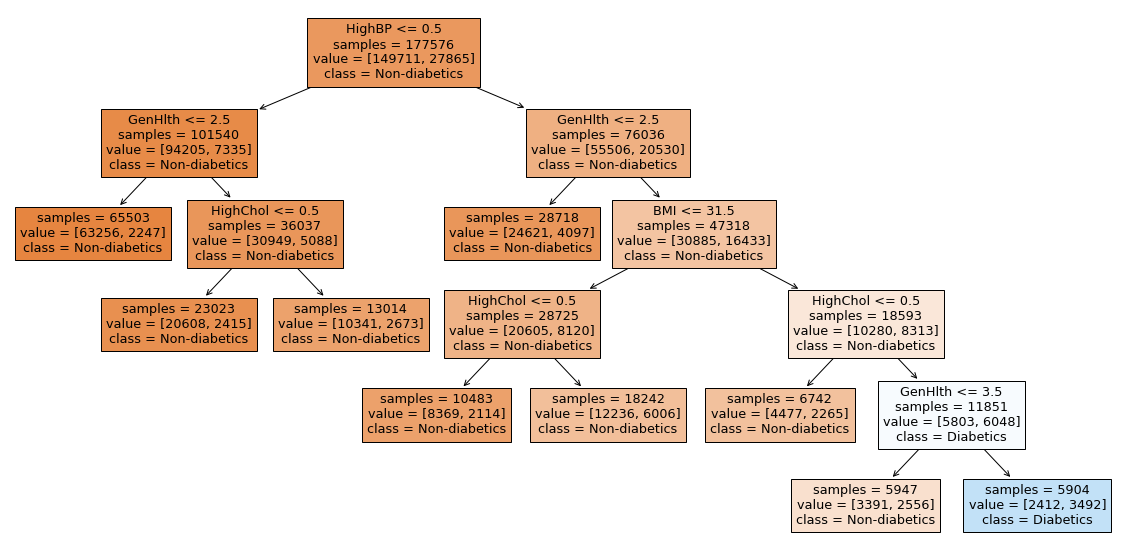

In [10]:
#Visualization

from sklearn import tree
# grid_tree.best_estimator_
print(tree.export_text(grid_tree.best_estimator_))

# Plot the decision tree

from sklearn import tree
fig = plt.figure(figsize=(20,10)) # set a proper figure size (in case that the figure is too small to read or ratio is not proper)

tree.plot_tree(grid_tree.best_estimator_, 
               feature_names = X_train.columns , # specify variable names 
               class_names = ["Non-diabetics","Diabetics"], # specify class (Y) names
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read
plt.show()

# save the figure to read through the boxes, it is saved under the same directory as the coding doc.
fig.savefig("grid_tree.jpg")

In [27]:
save_pickle('C:/Users/HP/OneDrive/Desktop/Sem-2/AML/decision_tree.pickle', grid_tree)

In [28]:
my_model = load_pickle('C:/Users/HP/OneDrive/Desktop/Sem-2/AML/decision_tree.pickle')

In [17]:
# GridSearch + CV

# estimator
d_tree = DecisionTreeClassifier(random_state = 0, max_depth=5, min_samples_split=2,max_leaf_nodes=9)



d_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9, random_state=0)

In [19]:
#defining of feature
feature = pd.Series(d_tree.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

HighBP                  0.497224
GenHlth                 0.319103
HighChol                0.094448
BMI                     0.089225
NoDocbcCost             0.000000
Education               0.000000
Age                     0.000000
Sex                     0.000000
DiffWalk                0.000000
PhysHlth                0.000000
MentHlth                0.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           0.000000
Veggies                 0.000000
Fruits                  0.000000
PhysActivity            0.000000
HeartDiseaseorAttack    0.000000
Stroke                  0.000000
Smoker                  0.000000
CholCheck               0.000000
Income                  0.000000
dtype: float64


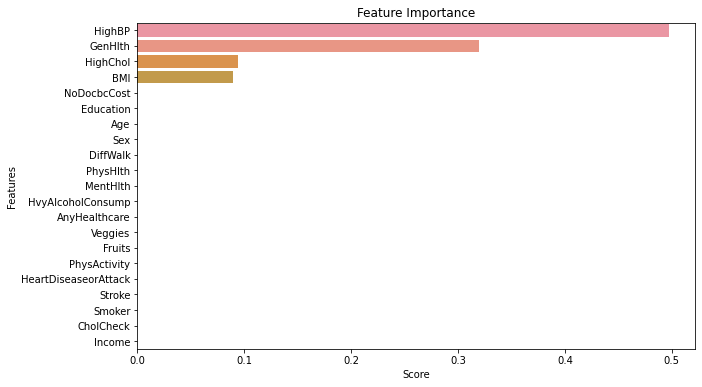

In [20]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [8]:
# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(d_tree, out_file ='tree.dot',
               feature_names =X_train.columns)

In [ ]:
print("The parameter chosen is:",dt_grid.best_params_)

# Random Forrest without hyperparameter tuning

In [15]:
#The model done with random forrest algorithm to check the model fit and how it changes.

diabetes_sample = diabetes.sample(n=1000, random_state=0)

# Split data into training and test
Xs=diabetes_sample.drop(['Diabetes_012'],axis=1)
Ys=diabetes_sample.Diabetes_012

Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs,Ys, random_state=0, test_size=0.3)


In [50]:
#RANDOM FORREST

# GridSearch + CV


# estimator
opt_rf = RandomForestClassifier(random_state = 0) # for all hyperparameters, apply the same setting


opt_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [51]:
# Report the best hyperparameters chosen

print("The score on train data is:" , opt_rf.score(X_train, y_train))

print("The score on test data is:" , opt_rf.score(X_test, y_test))

The score on train data is: 0.9940419876559895
The score on test data is: 0.8428991905813098


In [52]:
save_pickle('C:/Users/HP/OneDrive/Desktop/Sem-2/AML/random_forrest_wo.pickle', opt_rf)

In [53]:
my_model = load_pickle('C:/Users/HP/OneDrive/Desktop/Sem-2/AML/random_forrest_wo.pickle')

# Random forrest with hyper parameter tuning 

In [16]:
#RANDOM FORREST

# GridSearch + CV


# estimator
opt_rf = RandomForestClassifier(random_state = 0) # for all hyperparameters, apply the same setting


# hyperparameters (multiple)
dt_params = {'max_depth':  range(1,10)         ,
            'min_samples_split':   range(2,11),
             'max_leaf_nodes':    range(2,11)   }

#GridsearchCV
grid_rf = GridSearchCV(opt_rf, dt_params)

grid_rf.fit(Xs_train, ys_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [18]:
# Report the best hyperparameters chosen


print("The parameter chosen is:", grid_rf.best_params_)

print("The model fit is:", grid_rf.best_score_)

print("The score on train data is:" , grid_rf.score(X_train, y_train))

print("The score on test data is:" , grid_rf.score(X_test, y_test))



The parameter chosen is: {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_split': 9}
The model fit is: 0.862857142857143
The score on train data is: 0.8455084020363112
The score on test data is: 0.8436481656680332


In [40]:
save_pickle('C:/Users/HP/OneDrive/Desktop/Sem-2/AML/random_forrest.pickle', grid_rf)

In [41]:
my_model = load_pickle('C:/Users/HP/OneDrive/Desktop/Sem-2/AML/random_forrest.pickle')

# Random forrest visualization


In [20]:
# Visualising the Random Forest Regression results
 
# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values
X_grid = np.arrange(min(x), max(x), 0.01)
 
# reshape for reshaping the data into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value                 
X_grid = X_grid.reshape((len(X_grid), 1))
 
# Scatter plot for original data
plt.scatter(x, y, color = 'blue') 
 
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid),
         color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

In [12]:
opt_rf = RandomForestClassifier(random_state = 0,max_depth= 5, max_leaf_nodes=10, min_samples_split= 9)
opt_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=10, min_samples_split=9,
                       random_state=0)

In [13]:
#defining of feature
feature = pd.Series(opt_rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

GenHlth                 0.250880
HighBP                  0.222141
BMI                     0.133691
HighChol                0.121672
DiffWalk                0.110728
Age                     0.050925
HeartDiseaseorAttack    0.040022
PhysHlth                0.034541
Income                  0.017740
Education               0.007719
PhysActivity            0.004049
Stroke                  0.002638
CholCheck               0.001450
HvyAlcoholConsump       0.000978
MentHlth                0.000412
Veggies                 0.000349
Smoker                  0.000065
Fruits                  0.000000
AnyHealthcare           0.000000
NoDocbcCost             0.000000
Sex                     0.000000
dtype: float64


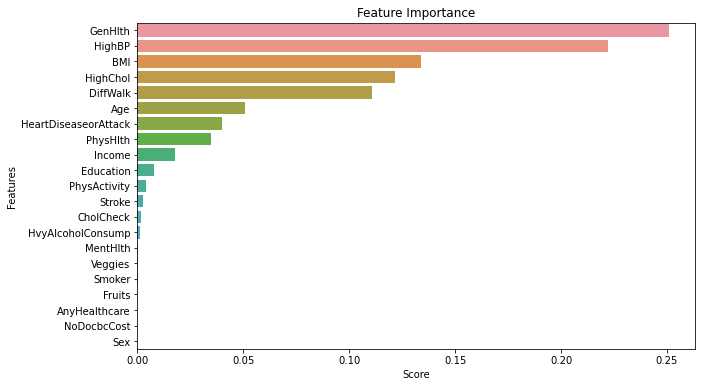

In [16]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [ ]:
pipe_tree = make_pipeline(tree.DecisionTreeRegressor(random_state=1))

In [ ]:
# make an array of depths to choose from, say 1 to 20
depths = np.arange(1, 11)
depths

In [ ]:
num_leafs = [1, 5, 10, 20, 50, 100]

In [ ]:
param_grid = [{'decisiontreeregressor__max_depth':depths,
              'decisiontreeregressor__min_samples_leaf':num_leafs}]

In [ ]:
gs = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=rmse_scorer, cv=10)

In [ ]:
gs = gs.fit(X_train_and_X_test, y_train_and_y_test)

In [ ]:
print(-gs.best_score_)

In [ ]:
my_model = gs.best_estimator_

In [ ]:
my_model.fit(X_train_and_X_test, y_train_and_y_test)